## Initialisation

In [1]:
# Path
SPECTRADIR <- 'C:/DATA/500_AD/S13-AA5'
METADATADIR <- 'C:/DATA/500_AD'
PROFILEDIR <- METADATADIR
OUTDIR <- 'tmp'

# Types of Instrument/Sequence/Wine
Field <- '500'
Type <- 'Red'
Sequence <- 'noesy';

# Filenames
PROFILE_FILENAME <- paste0(paste(c('profile-AJdos',Type,Sequence,Field),collapse='-'),'.txt')
SAMPLE_FILENAME <- 'samples-S13.txt' # see JNB sample-table 

# Results filename
XLSOUTPUT_FILENAME <- paste0('AA5-',Type,'_',Sequence,'_Integrals.xlsx')

# Select samples
# -------------------------------------------------------------------
pattern <- NULL
pattern <- '-(1m|50)'

# Select Zones
# -------------------------------------------------------------------
zones <- 31

In [2]:
# Load packages : create then popuplate a new RnmrQuant1D instance 
library(RnmrQuant1D)
rq1d <- RnmrQuant1D$new()
rq1d$OUTTYPE <- "png"

# Display the spectra path / infos
cat("Raw Spectra Path:", SPECTRADIR,"\n")
cat('Instrument Field =',Field,', Wine Type =',Type,', Sequence =',Sequence,"\n")

# Read the profile file - name in the form of profile-<Type>-<Sequence>-<Field>.txt
PROFILE <- file.path(PROFILEDIR, PROFILE_FILENAME)
cat("Profile:", PROFILE,"\n")
profile <- rq1d$readProfile(PROFILE)

# Read the sample file
SAMPLEFILE  <- file.path(METADATADIR, SAMPLE_FILENAME)
cat("Samples:", SAMPLEFILE,"\n")
samples <- utils::read.table(SAMPLEFILE, sep="\t", header=T,stringsAsFactors=FALSE)
if (!is.null(pattern)) samples <- samples[grep(pattern=pattern, samples[,1], value=FALSE), ]
cat('Nb samples =',nrow(samples),"\n")
samples
cat("\n\n")

# Output Directories
LOGDIR <- file.path(OUTDIR,'log'); 
if (! dir.exists(LOGDIR) )   dir.create(LOGDIR, showWarnings = FALSE)

# Full path of the results file
XLSOUTPUT <- file.path(METADATADIR,XLSOUTPUT_FILENAME)

#-----------------

# Populate rq1d object
rq1d$RAWDIR <- SPECTRADIR
rq1d$TMPDIR <- LOGDIR
rq1d$PROFILE <- profile
rq1d$SAMPLES <- samples
rq1d$SEQUENCE <- Sequence
rq1d$FIELD <- Field
rq1d$TYPE <- Type

# Check if data is OK
cat("----\n")
rq1d$check_samples(verbose=TRUE)
rq1d$check_profile(verbose=TRUE)
rq1d$check_outdir(verbose=TRUE)
cat("----\n\n")

Raw Spectra Path: C:/DATA/500_AD/S13-AA5 
Instrument Field = 500 , Wine Type = Red , Sequence = noesy 
Profile: C:/DATA/500_AD/profile-AJdos-Red-noesy-500.txt 
Samples: C:/DATA/500_AD/samples-S13.txt 
Nb samples = 6 


,Spectrum,Samplecode,EXPNO,PROCNO,PULSE,F_dilution
,<chr>,<chr>,<int>,<int>,<chr>,<dbl>
1,GLBBI_RB_AJdos-S13_AA5-1m,GLBBI_RB_AJdos-S13_AA5-1m-2,2,0,noesy,0.7815807
2,GLBBI_RB_AJdos-S13_AA5-1m,GLBBI_RB_AJdos-S13_AA5-1m-4,4,0,noesy,0.7815807
3,GLBBI_RB_AJdos-S13_AA5-1m,GLBBI_RB_AJdos-S13_AA5-1m-6,6,0,noesy,0.7815807
4,GLBBI_RB_AJdos-S13_AA5-50,GLBBI_RB_AJdos-S13_AA5-50-2,2,0,noesy,0.7795815
5,GLBBI_RB_AJdos-S13_AA5-50,GLBBI_RB_AJdos-S13_AA5-50-4,4,0,noesy,0.7795815
6,GLBBI_RB_AJdos-S13_AA5-50,GLBBI_RB_AJdos-S13_AA5-50-6,6,0,noesy,0.7795815




----
OK: C:/DATA/500_AD/S13-AA5 contains some Bruker spectra acquired with a noesy sequence
OK: all spectra reported in the sample table appear to match a spectrum under C:/Workdir/Metabolomic/WAP-NMR/Vin_Test/500_AD/S13-AA5
OK: the sample table has at least 4 columns with one named 'F_dilution'
OK: the quantification profile format seems correct
OK: output directories are correctly defined
----



## Processing

In [3]:
NCPU <- 6
SAVE <- FALSE
REP <- TRUE

In [4]:
# Launch spectra processing
cat('Quantification Zones :', paste(zones,collapse=','),"...\n")
t <- system.time({ rq1d$proc_Integrals(zones, ncpu=NCPU, verbose=2) })
t

# Save the integrals/SNR matrices
if (SAVE) {
    rq1d$save_Matrices(XLSOUTPUT, filelist=list(SAMPLEFILE=SAMPLEFILE, PROFILE=PROFILE))
    cat("Matrices saved !\n\n")
}

if (nrow(samples)>30 || length(zones)>10) stop_quietly()

# Display the matrices
INT <- rq1d$get_Matrix_Integrals()
SNR <- rq1d$get_Matrix_SNR()
cat("Integration:\n"); round(INT)
cat("SNR:\n"); round(SNR)

if (REP) {
    M <- rq1d$get_Matrix_CV(INT, nbrep=3)
    cat("Repetition CV (%)\n"); print(round(M,2))
}

Quantification Zones : 31 ...


utilisateur     système      écoulé 
       0.39        0.06        9.25 

Integration:


,fructose
GLBBI_RB_AJdos-S13_AA5-1m-2,1815267
GLBBI_RB_AJdos-S13_AA5-1m-4,1774629
GLBBI_RB_AJdos-S13_AA5-1m-6,1836583
GLBBI_RB_AJdos-S13_AA5-50-2,2385285
GLBBI_RB_AJdos-S13_AA5-50-4,2326206
GLBBI_RB_AJdos-S13_AA5-50-6,2399881


SNR:


,fructose
GLBBI_RB_AJdos-S13_AA5-1m-2,494
GLBBI_RB_AJdos-S13_AA5-1m-4,549
GLBBI_RB_AJdos-S13_AA5-1m-6,490
GLBBI_RB_AJdos-S13_AA5-50-2,669
GLBBI_RB_AJdos-S13_AA5-50-4,634
GLBBI_RB_AJdos-S13_AA5-50-6,676


Repetition CV (%)
                          fructose
GLBBI_RB_AJdos-S13_AA5-1m     1.74
GLBBI_RB_AJdos-S13_AA5-50     1.65


## Visualisation

In [5]:
# View spectra
width <- 'auto'; plotTrueSpec <- plotzones <- FALSE; TAGS <- 'id'; verbose <- TRUE

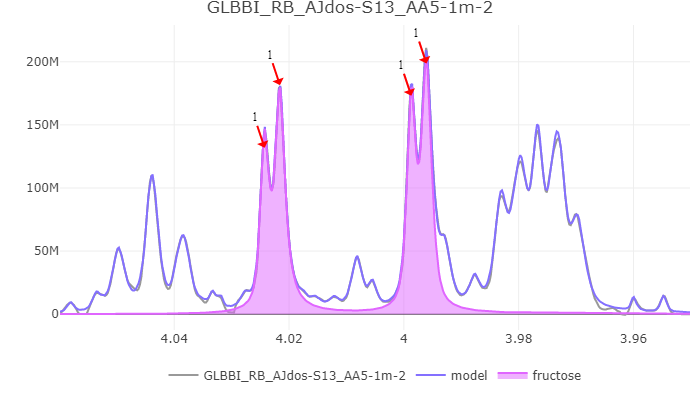

     [,1]       [,2]         
[1,] "fructose" "15,16,22,23"

     pos      ppm       amp        sigma asym       eta integral
15 29359 3.996059 189179731 0.0009882496   50 0.6579348 546735.2
16 29370 3.998703 164853401 0.0008459422   50 0.7019842 411726.1
22 29463 4.021583 172843484 0.0010486222   50 0.9505056 563709.7
23 29474 4.024258 125541185 0.0007997186   50 0.6500000 293096.3



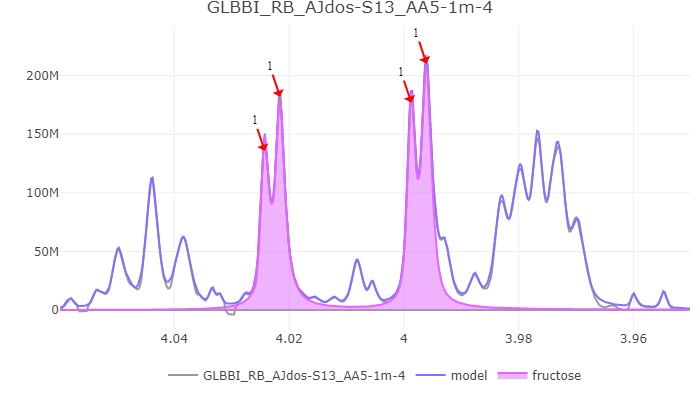

     [,1]       [,2]         
[1,] "fructose" "15,16,22,23"

     pos      ppm       amp        sigma     asym       eta integral
15 29359 3.996058 200302176 0.0009910165 50.00000 0.7256256 589032.1
16 29370 3.998703 168570151 0.0007366627 50.00000 0.6500000 362523.6
22 29463 4.021569 173349298 0.0010013198 42.81859 0.9734447 542384.8
23 29474 4.024240 129337697 0.0007389589 50.00000 0.6775299 280688.8



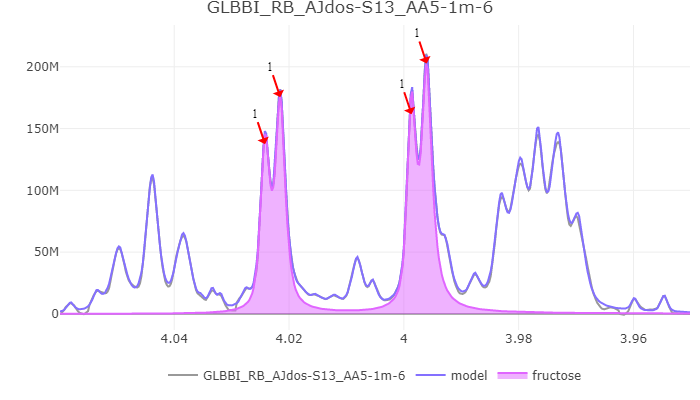

     [,1]       [,2]         
[1,] "fructose" "12,13,22,23"

     pos      ppm       amp        sigma     asym       eta integral
12 29359 3.996014 192997408 0.0010942094 44.76171 0.9384926 655192.6
13 29369 3.998657 153889999 0.0008040208 50.00000 0.6500000 361214.0
22 29463 4.021525 167051750 0.0009724597 50.00000 0.7733727 486978.4
23 29474 4.024172 130857660 0.0008721992 50.00000 0.6500000 333197.5



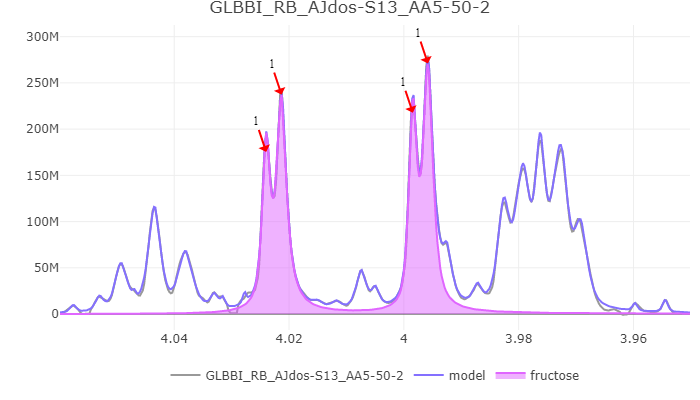

     [,1]       [,2]         
[1,] "fructose" "14,15,21,22"

     pos      ppm       amp        sigma     asym       eta integral
14 29360 3.995810 258059128 0.0010139412 50.00000 0.8164776 791528.1
15 29371 3.998438 207351064 0.0007606324 50.00000 0.6500000 460434.7
21 29464 4.021306 226028525 0.0010505788 43.60088 1.0000000 746005.0
22 29475 4.023984 167009625 0.0007713334 50.00000 0.7874770 387316.7



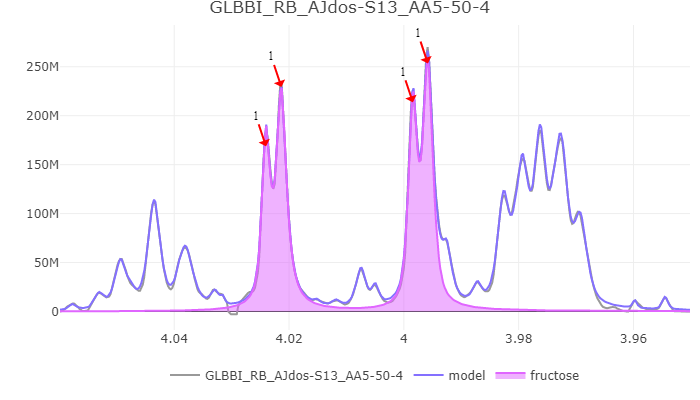

     [,1]       [,2]         
[1,] "fructose" "14,15,20,21"

     pos      ppm       amp        sigma      asym       eta integral
14 29359 3.995814 241263630 0.0009895385 50.000000 0.7097157 706018.2
15 29370 3.998436 203550405 0.0008619204 50.000000 0.7340940 521552.2
20 29463 4.021332 218422307 0.0010637620  6.779671 0.9356524 720453.6
21 29474 4.024005 160692412 0.0007878281 50.000000 0.7569578 378182.3



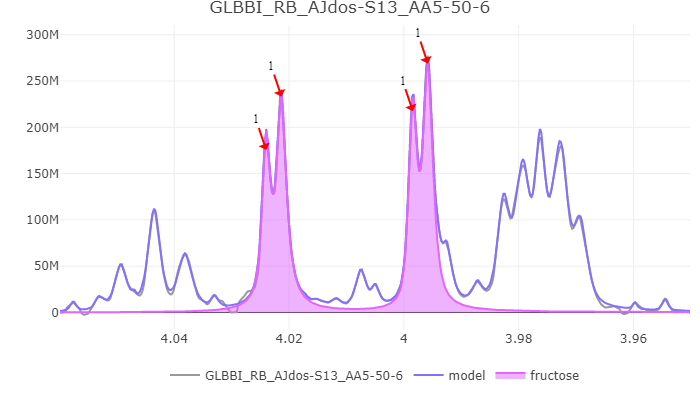

     [,1]       [,2]         
[1,] "fructose" "14,15,22,23"

     pos      ppm       amp       sigma     asym       eta integral
14 29359 3.995817 256099684 0.001019044 50.00000 0.7988594 786551.5
15 29370 3.998448 207139053 0.000788507 49.74494 0.6500000 476820.0
22 29463 4.021317 222028550 0.001043875 11.95035 0.9984648 727901.1
23 29474 4.023987 167139808 0.000798813 50.00000 0.8721696 408607.9



In [6]:
L <- length(unique(samples[,2]))
i <- 1;
plotfunc <- function(L, i) {
    fig <- NULL
    if (L>(i-1))
        fig <- rq1d$displayWidget(rq1d$view_spectra(i, plotTrueSpec=plotTrueSpec, plotzones=plotzones, 
                                         tags=TAGS, legendhoriz=TRUE, verbose=verbose), width=width)
    i <<- i + 1
    if (!is.null(fig)) fig
}
plotfunc(L,i); plotfunc(L,i); plotfunc(L,i); plotfunc(L,i); plotfunc(L,i)
plotfunc(L,i); plotfunc(L,i); plotfunc(L,i); plotfunc(L,i); plotfunc(L,i)
plotfunc(L,i); plotfunc(L,i); plotfunc(L,i); plotfunc(L,i); plotfunc(L,i)
plotfunc(L,i); plotfunc(L,i); plotfunc(L,i); plotfunc(L,i); plotfunc(L,i)
plotfunc(L,i); plotfunc(L,i); plotfunc(L,i); plotfunc(L,i); plotfunc(L,i)
plotfunc(L,i); plotfunc(L,i); plotfunc(L,i); plotfunc(L,i); plotfunc(L,i)

In [7]:
M <- as.matrix(cbind(rq1d$res$infos[,c(1,6,11,12)],INT[,1:ncol(INT)],SNR[,1:ncol(SNR)]))
if (ncol(INT)==1) { colnames(M)[ncol(M)-1] <- 'INT';  colnames(M)[ncol(M)] <- 'SNR';  }
rownames(M) <- NULL
M

Samplecode,nbpeaks,R2,Int. Diff. %,INT,SNR
GLBBI_RB_AJdos-S13_AA5-1m-2,37,0.9985,2.0085,1815267,494
GLBBI_RB_AJdos-S13_AA5-1m-4,36,0.9974,2.4076,1774629,549
GLBBI_RB_AJdos-S13_AA5-1m-6,35,0.9985,1.9735,1836583,490
GLBBI_RB_AJdos-S13_AA5-50-2,33,0.9978,1.8164,2385285,669
GLBBI_RB_AJdos-S13_AA5-50-4,32,0.9977,2.1801,2326206,634
GLBBI_RB_AJdos-S13_AA5-50-6,31,0.9980,1.8529,2399881,676
